# Introduction

### Question: Can we predict a match (both parties say yes to a second date)? 
### Classification Problem

The motivation behind this project is to look into the dating behavior of people to analyze gender differences in dating preferences. What do both men and women respectively seek in a partner? Just like in all matching markets, determininig these preferences from equilibrium outcomes is difficult. This project used survey data taken from a speed dating experiment amongst graduate students held at Columbia Univeristy back in 2002-2004. It looks into predicting whether a match (wherein both speed daters decide to meet again for a subsequent date) would be made. I wanted to see the difference between the genders so I aimed to divide the data by this category.

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import preprocessing
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
dating = pd.read_csv('data/dating.csv', encoding= "ISO-8859-1")

In [3]:
dating.head()
#pre-survey: profile, interests, attributes/preferences you value in a partner
#scorecard during speed dating: attributes of the partner, like, prob the person will say yes to you, dec: if you wanna see him/her again
#after event/follow-up survey and 3-4 weeks after the event survey (but I didn't look into this much because I wanted to predict a match with using only the pre-event and event info)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
dating.head()
#view as a multi index??

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
dating.shape

(8378, 195)

In [6]:
#total number of null values
(dating.isnull().sum())


iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

**There are many columns with NA values. This would be a challenge during the predictive modeling part. So, I can look at whether these columns are even needed.**

**The predictor variable of interest is the variable ```match```. 16.47% was a match.**

In [7]:
#total number of matches by the end of the night
#match = both parties said YES to second date; subject said yes to "do you want to meet partner again?"  AND partner said yes to "do you want to meet subject again?"
dating['match'].value_counts()
#1380/8378 = 0.1647     
#16.47% was a match

0    6998
1    1380
Name: match, dtype: int64

**Removing duplicates**

In [8]:
#data cleaning
#removing duplicates
replacements= {'94115': 'San Francisco', 'california':'California', 'California (West Coast)': 'California', 'I am from NYC': 'New York', 
               'new york': 'New York', 'nyc': 'New York', 'NYC': 'New York', 'New York City': 'New York','brooklyn, ny': 'New York', 'brooklyn ny': 'New York' , 
               'Manila, Philippines': 'Philippines', 'philippines': 'Philippines', 'Ann Arbor': 'Ann Arbor, MI','P.R. China': 'China', 'spain': 'Spain', 'uruguay':'Uruguay', 
               'Boston, MA': 'Boston', 'Boston, MA': 'Boston', 'Boston, Ma': 'Boston', 'china': 'China', 'lOS aNGELES': 'Los Angeles', 'india': 'India', 'NJ': 'New Jersey', 
               'Portland, OR': 'Portland, Oregon','sofia, bg':'Bulgaria','taiwan': 'Taiwan', 'Taipei, Taiwan':'Taiwan', 'MD':'Maryland', 'japan':'Japan', 
               'Born in Montana, raised in South Jersey (nr. Philadelphia)': 'Pennsylvania',
              'Pougkeepsie NY': 'New York', 'Brooklyn, NY': 'New York', 'Long Island' : 'New York',
              'Milano, Italy': 'Italy', 'Philadelphia': 'Pennsylvania','Staten Island' : 'New York', 'Bogota, Colombia': 'Colombia',
              'Albuquerque, NM': 'New Mexico', 'Georgia, USA': 'Georgia', 'Palm Springs, California': 'California', 'Kansas City, Missouri': 'Missouri',
              'TN': 'Tennessee', 'Santa Barbara, California': 'California', 'Greenwich, CT': 'Connecticut', 'Pittsburgh, PA': 'Pennsylvania',
              'Upstate New York': 'New York', 'Greece/Germany': 'Greece', 'Tokyo and Texas': 'Tokyo'}


dating['from'].replace(replacements, inplace = True)


In [9]:
dating['from'].value_counts()

New York         1014
New Jersey        437
California        352
Boston            189
Pennsylvania      161
                 ... 
Lexington, MA       9
Tokyo               9
Missouri            7
Tennessee           6
Europe              5
Name: from, Length: 227, dtype: int64

#### Remove commas in columns and turn into float

In [10]:
dating["tuition"] = dating["tuition"].str.replace(",","").astype(float)
dating["mn_sat"] = dating["mn_sat"].str.replace(",","").astype(float)
dating["income"] = dating["income"].str.replace(",","").astype(float)

**Drop columns that are not needed for the model.**

In [11]:
#remove all columns with more than 900+ NaN values
dating_1 = dating.copy()
dating_1.drop(['positin1', 'shar_o','amb_o','expnum','attr4_1','sinc4_1','intel4_1','fun4_1','amb4_1',
             'shar4_1','attr5_1','sinc5_1','intel5_1','fun5_1','amb5_1','shar','match_es',
             'attr1_s','sinc1_s','attr7_2','sinc7_2','intel7_2','fun7_2','amb7_2','shar7_2',
             'attr4_2','intel1_s','fun1_s','amb1_s','shar1_s','attr3_s','sinc3_s','intel3_s','fun3_s',
             'amb3_s','sinc4_2','intel4_2','fun4_2','amb4_2','shar4_2','attr2_2','sinc2_2','intel2_2','fun2_2',
             'amb2_2','shar2_2','attr5_2','sinc5_2','intel5_2','fun5_2','amb5_2','you_call','them_cal', 'date_3',
             'numdat_3','num_in_3','attr1_3','sinc1_3','intel1_3','fun1_3','amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3',
             'intel7_3', 'fun7_3', 'amb7_3','shar7_3','attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3','attr2_3',
             'sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3','attr3_3','sinc3_3','intel3_3','fun3_3','amb3_3','attr5_3',
             'sinc5_3','intel5_3','fun5_3','amb5_3','satis_2','length','numdat_2','attr1_2','sinc1_2','intel1_2','fun1_2',
             'amb1_2','shar1_2','attr3_2','sinc3_2','intel3_2','fun3_2','amb3_2'], axis =1, inplace=True)

In [12]:
dating_1

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,1,1.0,0,1,1,1,10,7,4,1,...,7.0,1,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
1,1,1.0,0,1,1,1,10,7,3,2,...,7.0,1,7.0,8.0,7.0,8.0,5.0,7.0,5.0,1.0
2,1,1.0,0,1,1,1,10,7,10,3,...,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,NaN,1.0
3,1,1.0,0,1,1,1,10,7,5,4,...,7.0,1,7.0,6.0,8.0,7.0,6.0,7.0,6.0,2.0
4,1,1.0,0,1,1,1,10,7,7,5,...,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,5,18,...,7.0,0,3.0,5.0,5.0,5.0,NaN,2.0,5.0,0.0
8374,552,22.0,1,44,2,21,22,13,4,19,...,7.0,0,4.0,6.0,8.0,4.0,4.0,4.0,4.0,0.0
8375,552,22.0,1,44,2,21,22,19,10,20,...,7.0,0,4.0,7.0,8.0,8.0,8.0,6.0,5.0,0.0
8376,552,22.0,1,44,2,21,22,3,16,21,...,7.0,0,4.0,6.0,5.0,4.0,NaN,5.0,5.0,0.0


**Null values in percentage**

In [13]:
(dating_1.isnull().sum())

iid         0
id          1
gender      0
idg         0
condtn      0
         ... 
fun       350
amb       712
like      240
prob      309
met       375
Length: 91, dtype: int64

**Because there are a lot of null values, I will narrow the dataset to only use attributes that are most useful for the analysis.**

In [14]:
dating_1.dtypes

iid         int64
id        float64
gender      int64
idg         int64
condtn      int64
           ...   
fun       float64
amb       float64
like      float64
prob      float64
met       float64
Length: 91, dtype: object

### Selecting the predictor variable

```match``` is the binary variable of interest. 1 signifies a match between two speed daters while 0 means no match.

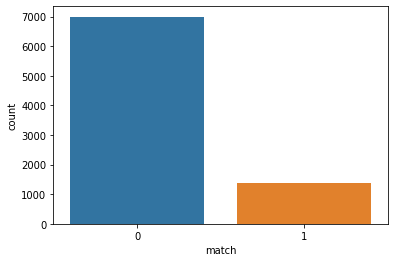

In [15]:
sns.countplot(x = 'match', data = dating_1)



In [16]:
count_no_match = len(dating_1[dating_1['match']==0])
count_match = len(dating_1[dating_1['match']==1])
pct_of_no_match = count_no_match/(count_no_match+count_match)
print("percentage of no match is", pct_of_no_match*100)
pct_of_match = count_match/(count_no_match+count_match)
print("percentage of match", pct_of_match*100)

percentage of no match is 83.52828837431368
percentage of match 16.47171162568632


#### This is a case of imbalanced data. We will have to balance this out in the feature engineering section.

# Exploratory Data Analysis

In this part of the project, I first wanted to get an overview of the data and the different takeaways that we can learn from it. Let's separate the demographic profiles of the speed daters by gender.

**By Race**

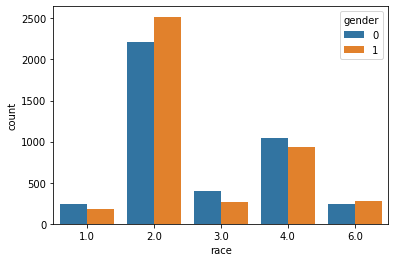

In [17]:
#data visualization
#profile of speed daters at registration
#race



sns.countplot(x = 'race', hue='gender', data = dating_1)
#majority of speed daters are caucasian for both genders
#change numbers into labels (xlabel)

**By field of study**

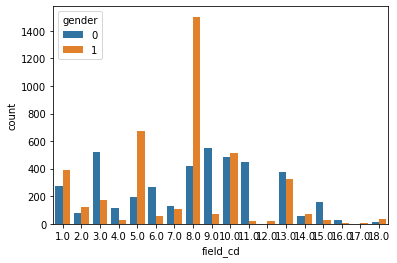

In [18]:
#Field of study
sns.countplot(x = 'field_cd', hue= 'gender',data = dating_1)
#majority of males in Business
#majority of females in Education
# add xlabels

**By intended career**

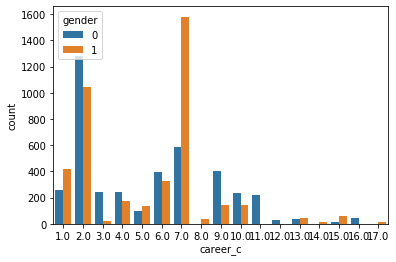

In [19]:
#intended career
sns.countplot(x = 'career_c', hue= 'gender',data = dating_1)
#majority of males: banking, consulting, finance, business
#majority of female: academia/research

**By attributes prior to the event**

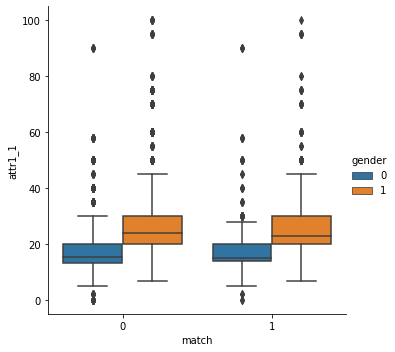

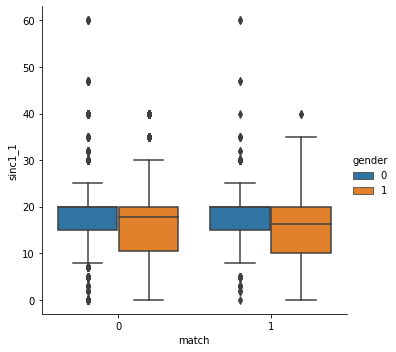

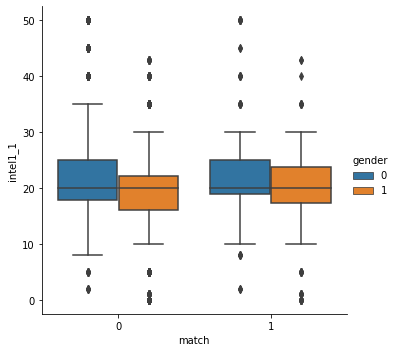

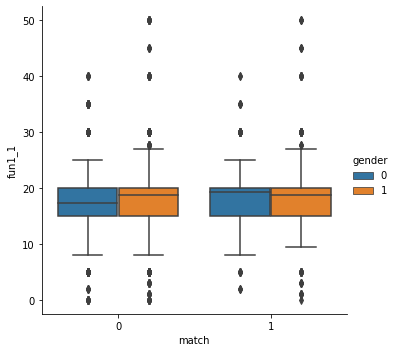

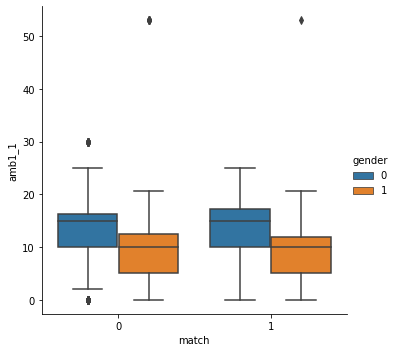

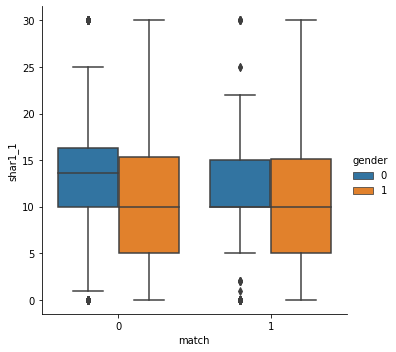

In [20]:
#Looking at different preferences/attributes (prior to the event -> pre-event survey)
#each person rates how much he/she values Attractiveness, Sincerity, Intelligence, Fun, Ambition, Shared interests towards opposite gender

sns.catplot(x= 'match', y= 'attr1_1', hue = 'gender', kind = 'box',data = dating_1)
sns.catplot(x= 'match', y= 'sinc1_1', hue = 'gender', kind = 'box',data = dating_1)
sns.catplot(x= 'match', y= 'intel1_1', hue = 'gender', kind = 'box',data = dating_1)
sns.catplot(x= 'match', y= 'fun1_1', hue = 'gender', kind = 'box',data = dating_1)
sns.catplot(x= 'match', y= 'amb1_1', hue = 'gender', kind = 'box',data = dating_1)
sns.catplot(x= 'match', y= 'shar1_1', hue = 'gender', kind = 'box',data = dating_1)
#Importance of Attractiveness: Male > Female
#mating hypothesis; possible reason: attractiveness/physical appearance is a signal for reproductive capacity/fertility, youthfulness
#Sincere
#Intelligent: Female > Male; females look for a provider of resources
#Fun
#Ambitious: Female > Male; females look for a provider of resources
#shared interests

**Which gender got more rejections?**

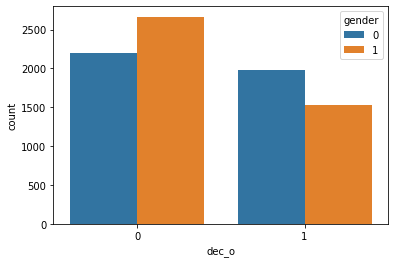

In [21]:
sns.countplot(x = 'dec_o', hue= 'gender',data = dating_1)
#want to see if the partner said yes to the subject for a second date; who gets more rejections?
#more females get a yes for a second date
#males get rejected more for a second date

#### Correlation plots

In [22]:
#remove the 3 columns of strings: 'from', 'career','field' to find any correlation with 'match'
dating2 = dating_1.drop(['from','field','career', 'id', 
                         'iid', 'idg', 'condtn', 'round', 
                         'position', 'partner', 'pid', 'wave', 'order', 'zipcode', 'undergra'], axis=1)



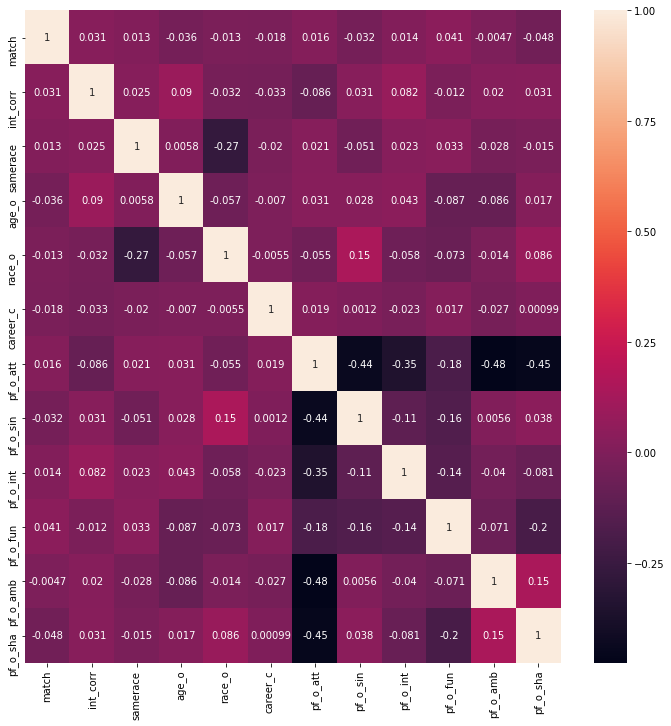

In [23]:
#Heatmap to see any correlation
#want to see if interests and attributes have any correlation with 'match'
dating2_a = dating2[['match', 'int_corr', 'samerace', 'age_o', 'race_o', 'career_c', 
                     'pf_o_att', 'pf_o_sin','pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha']]
plt.figure(figsize=(12,12))

sns.heatmap(dating2_a.corr(), annot = True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t)
plt.show()
#what I noticed is that none of the interests looked like they had strong correlations with 'match'

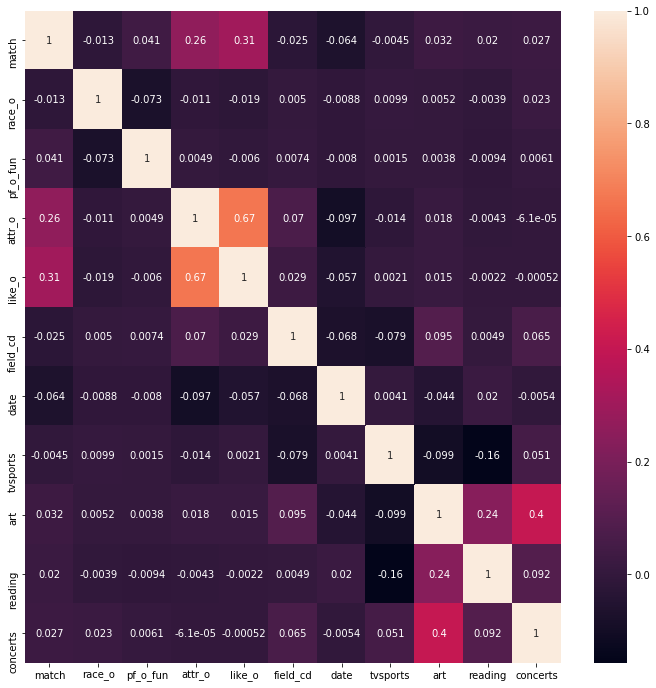

In [24]:
plt.figure(figsize=(12,12))
dating2_b = dating2[['match', 'race_o', 'pf_o_fun', 'attr_o', 'like_o', 'field_cd',
                    'date', 'tvsports', 'art', 'reading', 'concerts']]
sns.heatmap(dating2_b.corr(), annot = True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t)
plt.show()

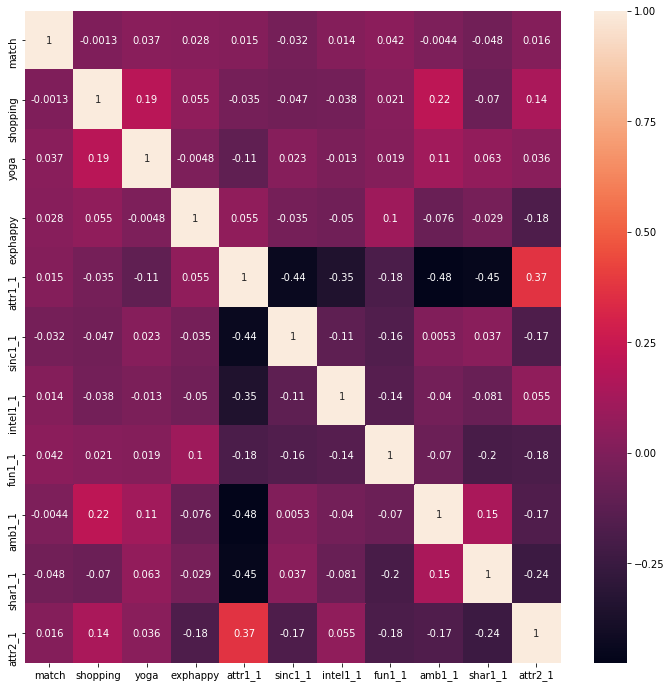

In [25]:
plt.figure(figsize=(12,12))
dating2_c = dating2[['match', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1',
                    'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1']]
sns.heatmap(dating2_c.corr(), annot = True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t)
plt.show()

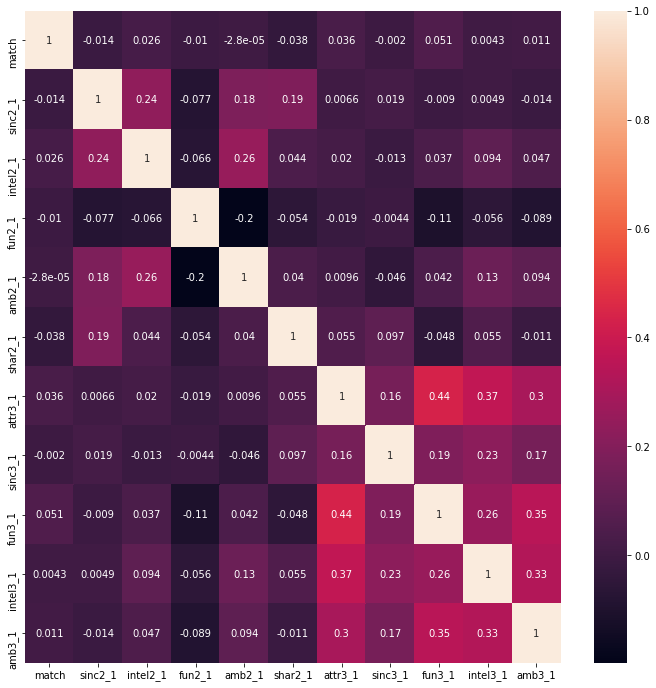

In [26]:
plt.figure(figsize=(12,12))
dating2_d = dating2[['match', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1',
                    'attr3_1', 'sinc3_1','fun3_1', 'intel3_1', 'amb3_1']]
sns.heatmap(dating2_d.corr(), annot = True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t)
plt.show()

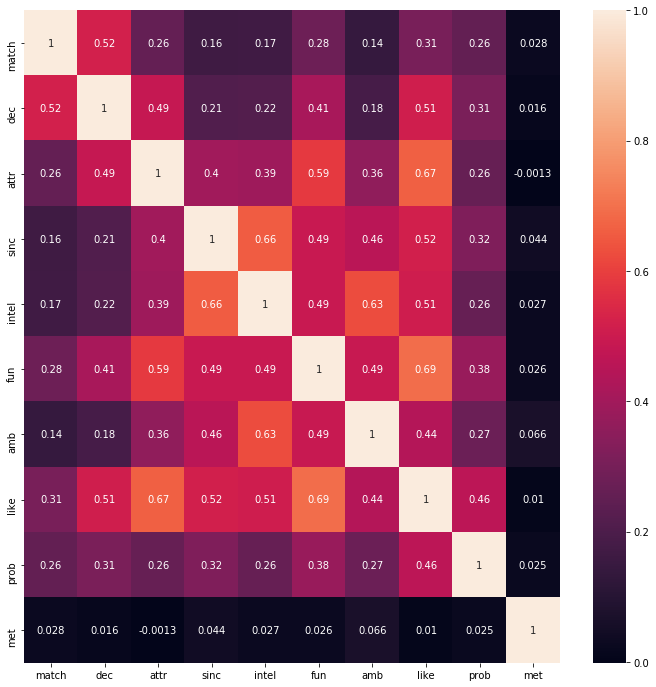

In [27]:
plt.figure(figsize=(12,12))
dating2_e = dating2[['match', 'dec', 'attr', 'sinc', 'intel', 
                     'fun', 'amb', 'like', 'prob', 'met']]
sns.heatmap(dating2_e.corr(), annot = True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5
plt.ylim(b, t)
plt.show()


# Feature Engineering

- dealing with null values
- data is already encoded
- looking at balanced/imbalanced data: steps to take
- format the data properly
- clean the data


**Split data into training and testing before feature selection**
Use training data (or training folds) only for feature screening or any other data manipulation for that matter.
Do not use any information from the validation set that the model can benefit from while predicting on the same validation set. Validation should always be independent.


In [28]:
#Split data into training and test
X = dating2.loc[:, dating2.columns != 'match'] #explanatory
y = dating2['match'] #predictor variable


X.columns

Index(['gender', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field_cd', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig',
       'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1',
       'amb3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'prob',
       'met'],
      dtype='object')


# Data Cleaning
### Imputation of Missing Values in Survey Data

Data is MAR. Missing at Random. Inappropriately handling missing data may lead to: biased estimates, incorrect standard errors, incorrect inferences/results.
- type of missing data is item nonresponse. Respondents did not complete some survey questions.
- We can handle this through imputation
- Goal: obtain accurate parameter estimates for relationships of interest

- multiple imputation involves creating multiple predictions for each missing value, the analyses of multiply imputed data take into account the uncertainty in the imputations (the variance between the estimated values) and yield more accurate standard errors.
- This is not the case with the single imputation methods, which tend to make for smaller standard errors of measurement, which in turn can contribute to Type I error.
- Easy and effective


Good Source: https://www.mchnavigator.org/documents/Stuart-MissingData.pdf


**Split the Data**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) 

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer #multiple imputation
from sklearn.pipeline import Pipeline
from sklearn.linear_model import BayesianRidge

In [32]:
MICE_imputer =IterativeImputer(estimator = BayesianRidge(n_iter=5), sample_posterior = True, max_iter = 10, random_state = 0)
X_train_imputed = MICE_imputer.fit_transform(X_train)
X_test_imputed = MICE_imputer.transform(X_test)

In [33]:
y_train.value_counts()

0    4892
1     972
Name: match, dtype: int64

There shouldn't be any more null values in the imputed training sets.

#### Handling imbalanced data by  using combination of Tomek and SMOTE algorithm (undersampling and oversampling)

In [34]:
from imblearn.combine import SMOTETomek
os = SMOTETomek(random_state=42)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train_imputed, y_train)


Using TensorFlow backend.


In [35]:
#convert into Dataframe
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )


In [36]:
os_data_y.value_counts() #y values are now balanced

1    4537
0    4537
Name: match, dtype: int64

The classes are now balanced. I only used the training data and not the test data because the information in the test data to avoid data leakage.

# Feature Selection


→ It enables the machine learning algorithm to train faster, reduces the complexity and makes it easier to interpret.
→ It improves the accuracy of a model if the right subset is chosen.
→ It reduces overfitting.
- dimensionality reduction, basically

#### Recursive Feature Elimination


In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', max_iter = 100, random_state = 42)

In [38]:
#Logistic Regression Baseline Model

lr_baseline_model = model.fit(os_data_X, os_data_y)

In [39]:
rfe = RFE(model, step=1)
rfe = rfe.fit(os_data_X, os_data_y)

In [40]:
os_data_X.columns

Index(['gender', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field_cd', 'mn_sat', 'tuition', 'race', 'imprace', 'imprelig',
       'income', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1',
       'amb3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'like', 'prob',
       'met'],
      dtype='object')

In [41]:
pd.set_option('display.max_rows', None)
selected_rfe_features = pd.DataFrame({'Feature':list(os_data_X.columns),
                                     'Ranking':rfe.ranking_,
                                    'Yes/No': rfe.support_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking,Yes/No
74,met,1,True
67,attr,1,True
66,dec,1,True
50,sinc1_1,1,True
51,intel1_1,1,True
61,attr3_1,1,True
60,shar2_1,1,True
59,amb2_1,1,True
58,fun2_1,1,True
57,intel2_1,1,True


In [42]:
cols = ['met', 'attr', 'dec', 'sinc1_1', 'intel1_1', 
        'attr3_1', 'shar2_1', 'amb2_1', 'fun2_1',
       'intel2_1', 'sinc2_1', 'attr2_1', 'fun1_1',
       'shar1_1', 'amb1_1', 'museums',
       'fun', 'met_o', 'prob_o', 'int_corr', 'samerace',
       'like', 'amb', 'pf_o_sin', 'art',
       'pf_o_fun', 'pf_o_sha', 'dec_o', 'attr_o',
       'movies', 'intel_o', 'fun_o', 'like_o',
       'pf_o_amb', 'prob']

X = os_data_X[cols] #training
y = os_data_y.to_frame()

In [43]:
X.head()

,met,attr,dec,sinc1_1,intel1_1,attr3_1,shar2_1,amb2_1,fun2_1,intel2_1,...,pf_o_fun,pf_o_sha,dec_o,attr_o,movies,intel_o,fun_o,like_o,pf_o_amb,prob
0,0.0,6.0,0.0,15.00,20.00,5.0,10.00,10.00,20.00,10.00,...,15.00,5.00,0.0,9.645752,9.0,9.570077,5.993907,6.0,5.00,3.0
1,2.0,7.0,0.0,18.00,20.00,7.0,11.90,14.29,16.67,19.05,...,23.81,2.38,1.0,7.000000,10.0,7.000000,6.000000,6.0,2.38,5.0
2,0.0,8.0,1.0,20.00,27.00,7.0,10.00,10.00,25.00,10.00,...,20.00,15.00,1.0,7.000000,7.0,8.000000,8.000000,7.0,10.00,6.0
3,0.0,8.0,1.0,14.29,21.43,9.0,15.22,15.22,19.57,17.39,...,17.95,15.38,0.0,8.000000,6.0,9.000000,7.000000,6.0,2.56,6.0
4,2.0,6.0,0.0,15.00,20.00,7.0,15.00,15.00,20.00,20.00,...,15.00,17.00,0.0,4.000000,8.0,8.000000,7.000000,7.0,15.00,5.0


# Predictive Modeling And Evaluation Metrics using Pipelines
1. Logistic Regression - Supervised
2. Naive Bayes Classifier - 
3. Random Forest
4. KNN - Standard scaling
5. Decision Trees


6. Cross Validation
7. K fold
8. GridSearch CV



#### Implementing the model

I need to make sure that none of the variables are correlated with each other - meaning there is no collinearity

In [44]:
import statsmodels.api as sm
X = sm.add_constant(X)
logit_model = sm.Logit(y, X)
result=logit_model.fit()
print(result.summary())

/Users/annamontserratguerrero/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/annamontserratguerrero/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/annamontserratguerrero/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/Users/annamontserratguerrero/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: divide by zero encountered in true_divide
  return self.params / self.bse
/Users/annamontserratguerrero/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: Runti

         Current function value: 0.000826
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  match   No. Observations:                 9074
Model:                          Logit   Df Residuals:                     9038
Method:                           MLE   Df Model:                           35
Date:                Tue, 10 Mar 2020   Pseudo R-squ.:                  0.9988
Time:                        03:31:04   Log-Likelihood:                -7.4951
converged:                      False   LL-Null:                       -6289.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -65.9725        nan        nan        nan         nan         nan
met            0.3361      0.423      0.795      0.427      -0.49

#### Explanation
It seems like only the variables ```prob``` and ```dec_o``` are statistically significant.

The variable ```prob``` is a question on the survey that respondents must answer: Is it probable that this person will say yes to a second date with you? It is rated on a 10 point scale with 10 being the most probable.
The binary variable ```dec_o``` is a question for the partner that asks him/her whether they would go on a second date with the respondent. 1 is a yes and 0 is a no.

For a unit increase in the ```prob```, there is  0.1912 increase in the log odds that there would be a match.
For a unit increase in the ```dec_o```, there is  14.1339 increase in the log odds that there would be a match.

These features will be used for predictive modeling as they are the features that best explain the predictor variable ```match```.


In [45]:
#convert X_test_imputed into dataframe
#This will be used to predict the model
X_test_imputed_df= pd.DataFrame(X_test_imputed, columns = X_train.columns)
X_test_imputed_df.head()

,gender,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,...,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,1.0,-0.18,0.0,22.0,4.0,16.0,20.0,19.0,16.0,18.0,...,6.0,0.0,4.000000,8.000000,6.000000,6.000000,6.000000,4.000000,5.000000,0.000000
1,1.0,-0.39,0.0,26.0,2.0,40.0,5.0,30.0,15.0,5.0,...,9.0,0.0,8.041334,10.226637,7.396206,6.803032,10.108145,8.757401,7.571000,1.708036
2,1.0,0.37,0.0,26.0,4.0,18.0,18.0,20.0,18.0,16.0,...,7.0,1.0,10.000000,8.000000,8.000000,9.000000,8.000000,9.000000,9.000000,0.000000
3,1.0,0.06,0.0,32.0,2.0,5.0,25.0,20.0,10.0,15.0,...,3.0,0.0,4.000000,7.000000,7.000000,6.000000,8.000000,5.000000,4.000000,0.000000
4,1.0,0.41,0.0,26.0,3.0,15.0,15.0,15.0,20.0,20.0,...,8.0,1.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,10.048983,0.000000


In [46]:
cols = ['prob', 'dec_o']
X_train = X[cols] #training set
X_test = X_test_imputed_df[cols] #testing set
y_train = y['match']

In [47]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear', max_iter = 100, random_state = 42)
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.78


#### Confusion Matrix

The confusion matrix shows that there are 1559+391 = 1950 **correct** predictions and 547+17= 564 **incorrect** predictions.

- 1558 is the True Negative, meaning that the Actual value of the ```match``` is 0 and the Predicted value is 0 as well. There is no match.
- 548 is the False Positive, meaning the Actual Value is 0 but the Predicted Value is 1. The classifier incorrectly predicted that there is a match when there is none.
- 18 is the False Negative meaning that the Actual Value is 1 but the Predicted Value is 0.
- 390 is the True Positive, meaning that the Actual Value is 1 and the Predicted Value is 1 as well. There is a match.

In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1559  547]
 [  17  391]]


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85      2106
           1       0.42      0.96      0.58       408

    accuracy                           0.78      2514
   macro avg       0.70      0.85      0.71      2514
weighted avg       0.90      0.78      0.80      2514



#### ROC Curve metric

A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR). The true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)). Similarly, the false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)).
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

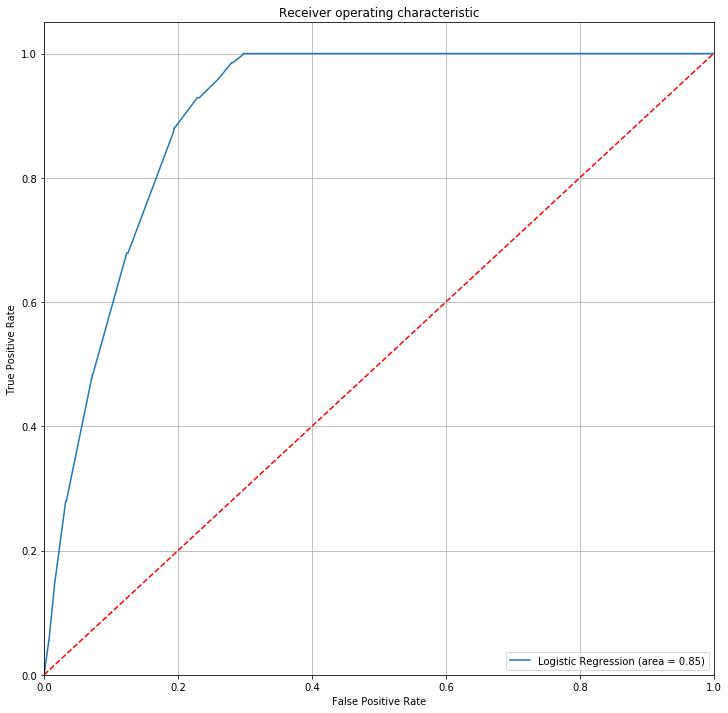

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,12))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid()
plt.show()

A good classifier stays as far away from that line as possible, where TP = FP.

### Evaluting the Model
#### Hyperparameter tuning: K-fold Cross Validation and GridSearch CV

Can we do better? Let's try to tune the hyperparameters of Logistic Regression using cross validation and grid search CV.

In [76]:
from sklearn.model_selection import cross_val_score

print('Average Cross Validation Score:', np.mean(cross_val_score(logreg, 
                              X_train, y_train, cv=10, scoring="accuracy")))
#perform 10 different experiments

Average Cross Validation Score: 0.8625787438862688


A 86% cross validation accuracy score is pretty high.

In [71]:
#k-fold and gridsearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)

kf = KFold(n_splits=10, shuffle=True, random_state=1)
log_cv = GridSearchCV(LogisticRegression(solver = 'liblinear', max_iter = 10000, random_state = 43), hyperparameters, cv=kf, verbose=0)

log_cv.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(log_cv.best_score_))
print("best parameters: {}".format(log_cv.best_params_))
print("test-set score: {:.3f}".format(log_cv.score(X_test, y_test)))

best mean cross-validation score: 0.862
best parameters: {'C': 1.0, 'penalty': 'l2'}
test-set score: 0.775


## Unsupervised Learning
#### Random Forest Classifier


In [52]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([('classifier', 
                      RandomForestClassifier(random_state = 42))])
pipeline.fit(X_train, y_train.values.ravel())

preds = pipeline.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      2106
           1       0.46      0.88      0.60       408

    accuracy                           0.81      2514
   macro avg       0.72      0.84      0.74      2514
weighted avg       0.89      0.81      0.83      2514



Using a Random Forest Classifier had a similar accuracy score.

**Data Analysis Regression Modeling and Multilevel Modeling**

1. Multilevel logistic regression model
https://www.coursera.org/lecture/fitting-statistical-models-data-python/multilevel-logistic-regression-models-02HBw

https://statmodeling.stat.columbia.edu/2008/01/21/the_speeddating_1/